# EDA
---
1. 근로기간은 필요없다? 확인들어갑니다.
    - 삭제가 맞다.
2. 총계좌수가 의미가 있나?
    - 의미 없는것 같음.
    - 연체 계좌수 2이상은 날림.
3.
4.
5.
6.


In [36]:
!pip3 install -U scikit-learn

   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 991.0 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.2 MB 22.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.6/9.2 MB 36.4 MB/s eta 0:00:01
   ------------------------------- -------- 7.3/9.2 MB 42.6 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.2 MB 45.3 MB/s eta 0:00:01
   ---------------------------------------- 9.2/9.2 MB 42.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   --------------------------------------- 302.2/302.2 kB 19.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\승범 pc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [193]:
from load import Data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
train_data = Data.train
test_data = Data.test
submit_data = Data.submission


In [194]:
# 한글 폰트 설정.
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [196]:
oject_dict

{'부채 통합': 0,
 '주택 개선': 1,
 '주요 구매': 2,
 '휴가': 3,
 '의료': 4,
 '자동차': 5,
 '신용 카드': 6,
 '소규모 사업': 7,
 '기타': 8,
 '이사': 9,
 '주택': 10,
 '재생 에너지': 11}

In [195]:
# 기존의 간단한 전처리
# 상환개월 신규 피처 생성.
train_data['대출기간'] = train_data['대출기간'].astype(str).str[:3].astype(int)
train_data['월원금상환금'] = train_data['대출금액']/train_data['대출기간']
train_data['상환개월'] = train_data['총상환원금']/train_data['월원금상환금']

train_data.drop(['월원금상환금'],axis=1, inplace=True)
train_data['상환개월'] = train_data['상환개월'].round().astype(int)

# 주택 소유상태 Any 데이터 제거(9만6천개중 단ㄱ1개)
train_data[train_data["주택소유상태"] != "ANY"].reset_index(drop = True,inplace = True)

# 대출 목적 라벨링.
train_object = train_data['대출목적'].unique()
oject_dict = dict()
for i, v in enumerate(train_data['대출목적'].unique()):
    oject_dict[v] = i
# 만약에 없다면 위의 데이터에 없다면 기타로 설정.
train_data['대출목적'] = train_data['대출목적'].apply(lambda x: oject_dict.get(x, '기타'))

# 근로기간 라벨링.
train_data['근로기간'] = train_data['근로기간'].astype(str)
train_data['근로기간'] = train_data['근로기간'].str.extract('(\d+)').astype(float)  # 숫자만 추출
# 'Unknown'은 NaN으로 변환되므로, 이를 -1로 대체
train_data['근로기간'].fillna(-1, inplace=True)
# '10+' ->  11로 대체
train_data.loc[train_data['근로기간'] == 10, '근로기간'] = 11
# '<1 year'  -> 0로 대체
train_data.loc[train_data['근로기간'].isna(), '근로기간'] = 0

# 대출 등급, 주택소유상태, 대출기간 라벨링.
le = LabelEncoder()
train_data['주택소유상태'] = le.fit_transform(train_data['주택소유상태'])
train_data['대출기간'] = le.fit_transform(train_data['대출기간'])
train_data['대출등급'] = le.fit_transform(train_data['대출등급'])

train_data.head(3)


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환개월
0,TRAIN_00000,12480000,0,6.0,3,72000000,18.90,15,0,0,0,0.0,0.0,0.0,2,0
1,TRAIN_00001,14400000,1,11.0,1,130800000,22.33,21,1,0,373572,234060.0,0.0,0.0,1,2
2,TRAIN_00002,12000000,0,5.0,1,96000000,8.60,14,0,0,928644,151944.0,0.0,0.0,0,3


In [197]:
correlation =  train_data[['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급',
       '상환개월']].corr()
correlation

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환개월
대출금액,1.000000,0.402573,0.119475,-0.178338,0.273975,0.002263,0.212309,-0.087416,-0.014775,0.379061,0.615680,0.011853,0.000182,0.137049,-0.038401
대출기간,0.402573,1.000000,0.074873,-0.094994,0.038396,0.030263,0.105956,-0.081022,-0.013857,-0.090007,0.412330,0.005247,0.006988,0.443839,-0.110226
근로기간,0.119475,0.074873,1.000000,-0.181638,0.084587,-0.000049,0.097322,-0.039107,0.024560,0.037853,0.070432,0.000998,0.004476,-0.017115,-0.006560
주택소유상태,-0.178338,-0.094994,-0.181638,1.000000,-0.126433,-0.003804,-0.206314,0.056161,-0.049717,-0.061978,-0.078036,0.003980,-0.020041,0.069104,0.008651
연간소득,0.273975,0.038396,0.084587,-0.126433,1.000000,-0.044594,0.145403,-0.000845,0.040260,0.137552,0.114311,0.000333,0.009854,-0.083666,0.016452
부채_대비_소득_비율,0.002263,0.030263,-0.000049,-0.003804,-0.044594,1.000000,0.058830,-0.005055,0.000699,-0.016180,0.018565,0.000711,0.000051,0.054121,-0.015354
총계좌수,0.212309,0.105956,0.097322,-0.206314,0.145403,0.058830,1.000000,-0.040569,0.112092,0.083615,0.116299,0.000037,0.023652,-0.039991,0.000728
대출목적,-0.087416,-0.081022,-0.039107,0.056161,-0.000845,-0.005055,-0.040569,1.000000,-0.021538,-0.015648,-0.093444,-0.001425,-0.003757,-0.091413,0.014442
최근_2년간_연체_횟수,-0.014775,-0.013857,0.024560,-0.049717,0.040260,0.000699,0.112092,-0.021538,1.000000,-0.010048,0.008095,0.004612,0.133632,0.039786,-0.004708
총상환원금,0.379061,-0.090007,0.037853,-0.061978,0.137552,-0.016180,0.083615,-0.015648,-0.010048,1.000000,0.412385,0.015379,-0.005190,-0.101515,0.769248


<Axes: >

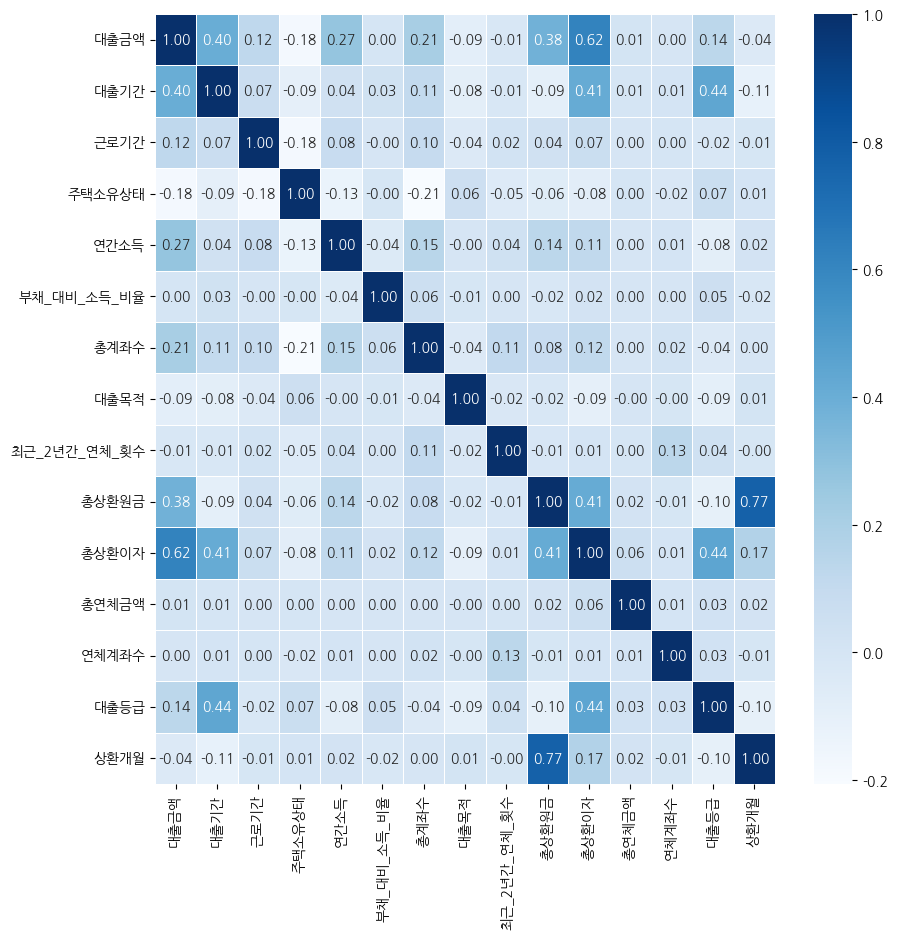

In [198]:
plt.figure(figsize=(10, 10))
sns.heatmap(data = correlation, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

# 근로기간 

C:\Users\승범 pc\AppData\Local\Temp\ipykernel_18580\1401557154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['등급별_건수'] = df.groupby(['근로기간', '대출등급'])['대출등급'].transform('count')
C:\Users\승범 pc\AppData\Local\Temp\ipykernel_18580\1401557154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['총_건수'] = df.groupby('근로기간')['대출등급'].transform('count')
C:\Users\승범 pc\AppData\Local\Temp\ipykernel_18580\1401557154.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

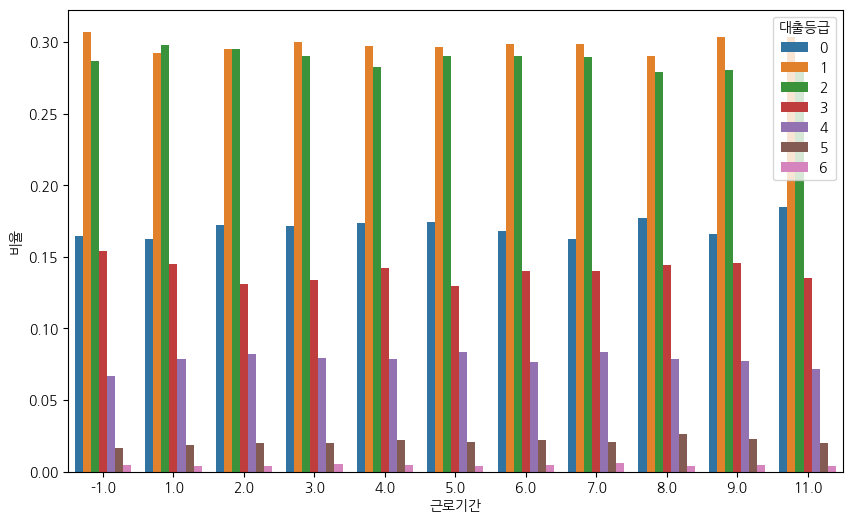

In [199]:
# 비율로 살펴보기
df =  train_data[['근로기간', '대출등급']]
# 각 근로기간별 대출 등급의 개수
df['등급별_건수'] = df.groupby(['근로기간', '대출등급'])['대출등급'].transform('count')

# 각 근로기간의 총 대출 건수
df['총_건수'] = df.groupby('근로기간')['대출등급'].transform('count')

# 비율 계산
df['비율'] = df['등급별_건수'] / df['총_건수']

plt.figure(figsize=(10,6))
sns.barplot(x='근로기간', y='비율', hue='대출등급', data=df)
plt.show()

In [175]:
le = LabelEncoder()
train_data['대출등급'] = le.fit_transform(train_data['대출등급'])

In [176]:
corr1 = train_data[['근로기간', '대출등급']].corr()
corr1

,근로기간,대출등급
근로기간,1.000000,-0.017957
대출등급,-0.017957,1.000000


In [177]:
# 근로기간 제거
train_data.drop(['근로기간'], axis=1, inplace=True)

# 총 계좌 수


C:\Users\승범 pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\승범 pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\승범 pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

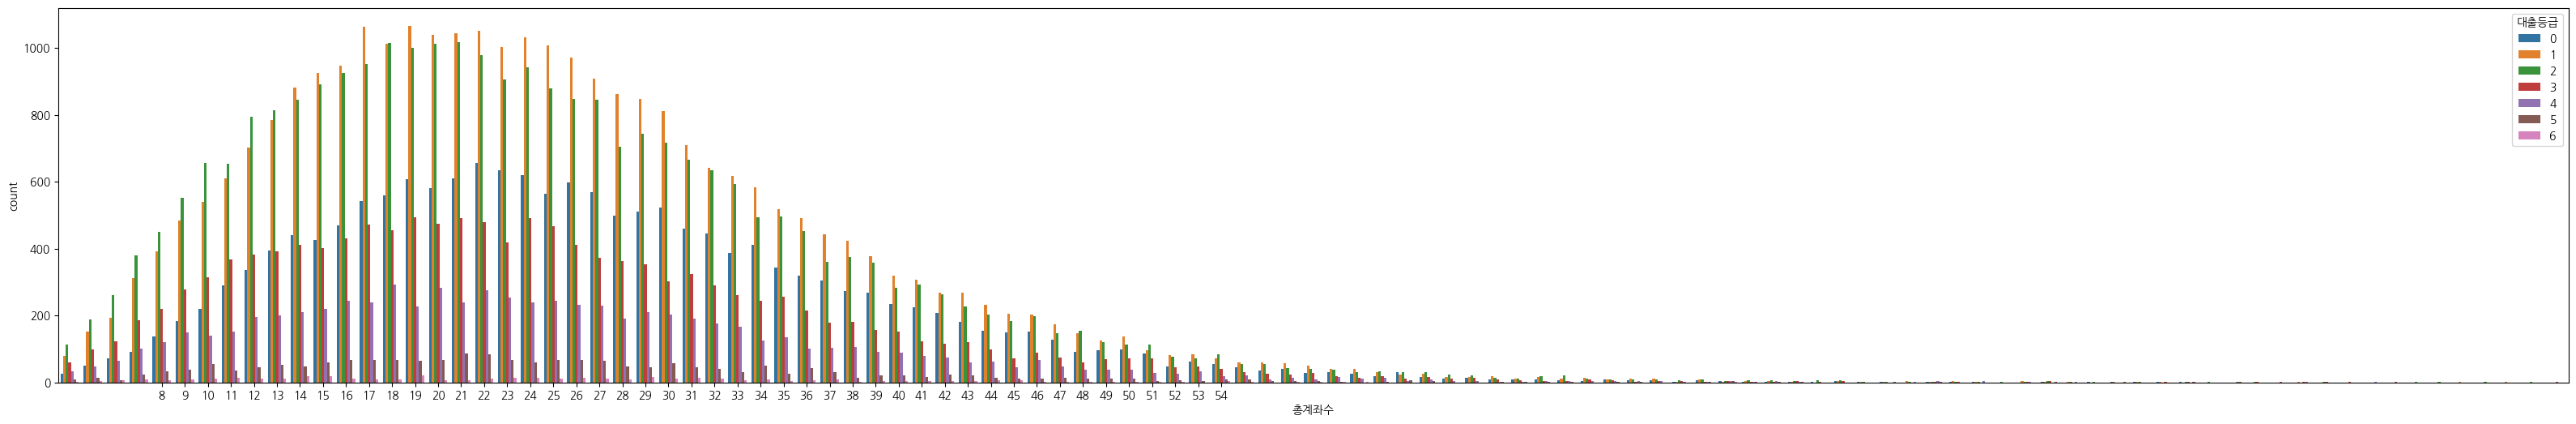

In [178]:
df = train_data[['대출등급', '총계좌수']]
plt.figure(figsize=(40,6))
sns.countplot(x='총계좌수', hue='대출등급', data=df)
plt.xticks(range(int(min(df['총계좌수'])), 51))
plt.show()

In [179]:
corr2 = train_data[['총계좌수', '대출등급']].corr()
corr2

,총계좌수,대출등급
총계좌수,1.000000,-0.039991
대출등급,-0.039991,1.000000


In [180]:
corr3 = train_data[['연체계좌수', '대출등급']].corr()
corr3

,연체계좌수,대출등급
연체계좌수,1.000000,0.025681
대출등급,0.025681,1.000000


In [181]:
# 신규 피처로 연체계좌수 비율
train_data['연체계좌비율'] =  train_data['연체계좌수'] / train_data['총계좌수']
corr4 = train_data[['연체계좌비율', '대출등급']].corr()
corr4

,연체계좌비율,대출등급
연체계좌비율,1.000000,0.025829
대출등급,0.025829,1.000000


C:\Users\승범 pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\승범 pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\승범 pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

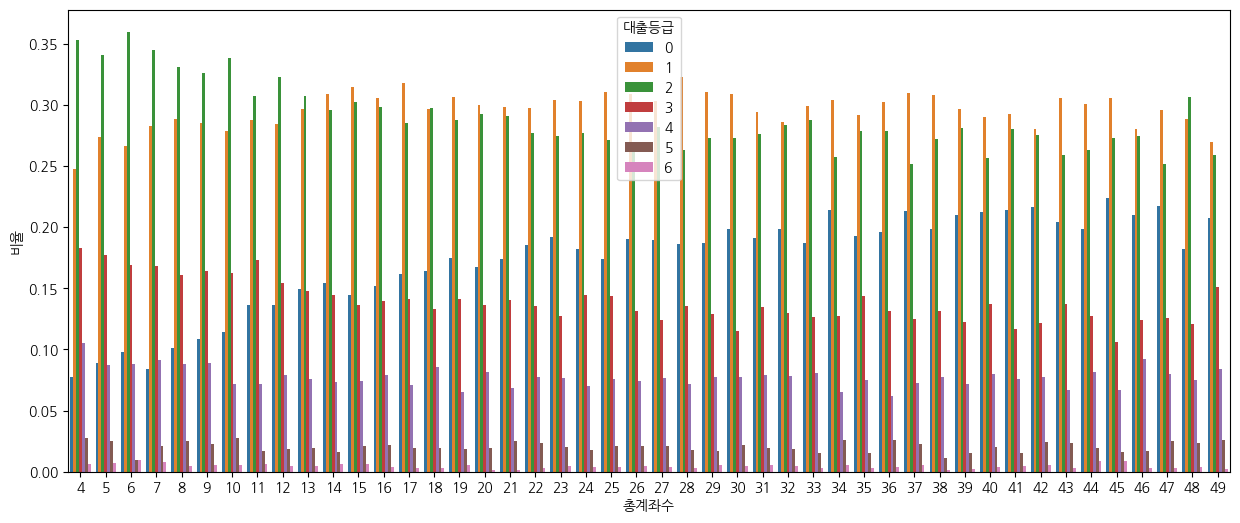

In [182]:
df = df[df['총계좌수'] < 50]
# 각 총계좌수별 대출 등급의 개수를 구합니다.
df['등급별_건수'] = df.groupby(['총계좌수', '대출등급'])['대출등급'].transform('count')

# 각 총계좌수의 총 대출 건수를 구합니다.
df['총_건수'] = df.groupby('총계좌수')['대출등급'].transform('count')

# 비율을 계산합니다.
df['비율'] = df['등급별_건수'] / df['총_건수']

# 비율을 시각화합니다.
plt.figure(figsize=(15,6))
sns.barplot(x='총계좌수', y='비율', hue='대출등급', data=df)
plt.show()

C:\Users\승범 pc\AppData\Local\Temp\ipykernel_18580\745771374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['등급별_건수'] = df.groupby(['연체계좌수', '대출등급'])['대출등급'].transform('count')
C:\Users\승범 pc\AppData\Local\Temp\ipykernel_18580\745771374.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['총_건수'] = df.groupby('연체계좌수')['대출등급'].transform('count')
C:\Users\승범 pc\AppData\Local\Temp\ipykernel_18580\745771374.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

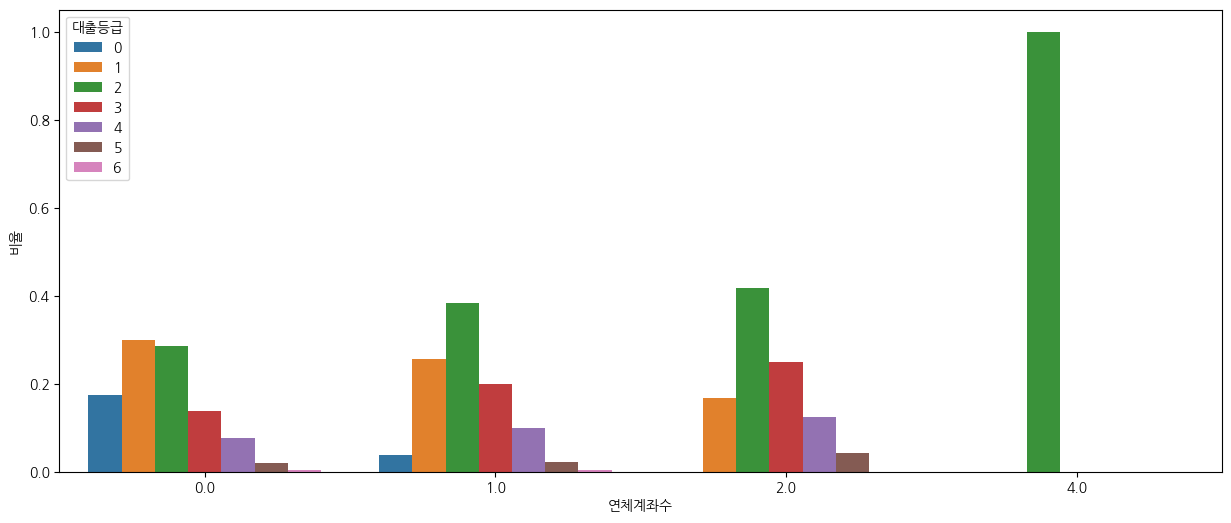

In [183]:
df =train_data[['연체계좌수', '대출등급']]

# 각 총계좌수별 대출 등급의 개수를 구합니다.
df['등급별_건수'] = df.groupby(['연체계좌수', '대출등급'])['대출등급'].transform('count')

# 각 총계좌수의 총 대출 건수를 구합니다.
df['총_건수'] = df.groupby('연체계좌수')['대출등급'].transform('count')

# 비율을 계산합니다.
df['비율'] = df['등급별_건수'] / df['총_건수']

# 비율을 시각화합니다.
plt.figure(figsize=(15,6))
sns.barplot(x='연체계좌수', y='비율', hue='대출등급', data=df)
plt.show()

* 연체계좌수도 날리기

In [184]:
train_data.columns

Index(['ID', '대출금액', '대출기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급', '상환개월',
       '연체계좌비율'],
      dtype='object')

# 학습

In [200]:
train_data = train_data[['대출금액', '대출기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '대출등급', '상환개월']]

In [201]:
train_x = train_data.drop(columns=['대출등급'])
train_y = train_data['대출등급']

test_x = test_data.drop(columns=['ID', '근로기간', '연체계좌수'])

In [202]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  int64  
 2   주택소유상태        96294 non-null  int32  
 3   연간소득          96294 non-null  int64  
 4   부채_대비_소득_비율   96294 non-null  float64
 5   총계좌수          96294 non-null  int64  
 6   대출목적          96294 non-null  int64  
 7   최근_2년간_연체_횟수  96294 non-null  int64  
 8   총상환원금         96294 non-null  int64  
 9   총상환이자         96294 non-null  float64
 10  총연체금액         96294 non-null  float64
 11  상환개월          96294 non-null  int32  
dtypes: float64(3), int32(2), int64(7)
memory usage: 8.1 MB


In [189]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [203]:
oject_dict

{'부채 통합': 0,
 '주택 개선': 1,
 '주요 구매': 2,
 '휴가': 3,
 '의료': 4,
 '자동차': 5,
 '신용 카드': 6,
 '소규모 사업': 7,
 '기타': 8,
 '이사': 9,
 '주택': 10,
 '재생 에너지': 11}

In [204]:
# 기존의 간단한 전처리
# 상환개월 신규 피처 생성.
test_x['대출기간'] = test_x['대출기간'].astype(str).str[:3].astype(int)
test_x['월원금상환금'] = test_x['대출금액']/test_x['대출기간']
test_x['상환개월'] = test_x['총상환원금']/test_x['월원금상환금']

test_x.drop(['월원금상환금'],axis=1, inplace=True)
test_x['상환개월'] = test_x['상환개월'].round().astype(int)

# 기타로 처리.
test_x['대출목적'] = test_x['대출목적'].apply(lambda x: oject_dict.get(x, 8))

# 대출 등급, 주택소유상태, 대출기간 라벨링.
le1 = LabelEncoder()
test_x['주택소유상태'] = le1.fit_transform(test_x['주택소유상태'])
test_x['대출기간'] = le1.fit_transform(test_x['대출기간'])

test_x.head(3)


,대출금액,대출기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,상환개월
0,16800000,0,0,132000000,19.64,12,1,0,394692,146604.0,0.0,1
1,8400000,0,2,89971200,15.84,25,0,0,0,0.0,0.0,0
2,17280000,0,2,150000000,8.41,20,6,0,1786980,281820.0,0.0,4


In [205]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64197 entries, 0 to 64196
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          64197 non-null  int64  
 1   대출기간          64197 non-null  int64  
 2   주택소유상태        64197 non-null  int32  
 3   연간소득          64197 non-null  int64  
 4   부채_대비_소득_비율   64197 non-null  float64
 5   총계좌수          64197 non-null  int64  
 6   대출목적          64197 non-null  int64  
 7   최근_2년간_연체_횟수  64197 non-null  int64  
 8   총상환원금         64197 non-null  int64  
 9   총상환이자         64197 non-null  float64
 10  총연체금액         64197 non-null  float64
 11  상환개월          64197 non-null  int32  
dtypes: float64(3), int32(2), int64(7)
memory usage: 5.4 MB


In [206]:
pred = model.predict(test_x)
print(pred)
pred = le.inverse_transform(pred)
pred

[1 1 0 ... 3 2 0]


array(['B', 'B', 'A', ..., 'D', 'C', 'A'], dtype=object)

In [207]:
submit_data['대출등급'] = pred
submit_data

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C
...,...,...
64192,TEST_64192,D
64193,TEST_64193,D
64194,TEST_64194,D
64195,TEST_64195,C


In [210]:
submit_data.to_csv('sample_submission.csv', index=False)